Name : Bishwo Raj Dhami

Student ID : 2413996

1) When and by whom was the dataset created?

Ans: The dataset was created by Aadarsh Velu and Anthony Alexia on May 5 2024.


2) How did you access the dataset?

Ans: I access the dataset using Kaggle.


3) How does it align with the chosen UNSDG?

Ans: This dataset directly aligns with **SDG 3: Good Health and Well-being**. It focuses on heart failure, a major NCD, and includes data on mortality and risk factors, enabling analysis for prevention and treatment strategies.

4) List all the attributes (columns) present in the dataset.

Ans: List of all the attributes (columns) present in the dataset are given below:

**age:** age of the patient (years)

**anaemia:** decrease of red blood cells or hemoglobin (boolean)

**creatinine phosphokinase (CPK):** level of the CPK enzyme in the blood (mcg/L)

**diabetes:** if the patient has diabetes (boolean)

**ejection fraction:** percentage of blood leaving the heart at each contraction (percentage)

**high blood pressure:** if the patient has hypertension (boolean)

**platelets:** platelets in the blood (kiloplatelets/mL)

**sex:** woman or man (binary)

**serum creatinine:** level of serum creatinine in the blood (mg/dL)

**serum sodium:** level of serum sodium in the blood (mEq/L)

**smoking:** if the patient smokes or not (boolean)

**time:** follow-up period (days)

**DEATH_EVENT:** if the patient died during the follow-up period (boolean)

In [ ]:
# 1. Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Concepts and Technology of AI/Final_Assessment/Classification/heart_failure_clinical_records.csv")

# Display basic information
df.info(), df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB


(None,
     age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
 0  55.0        0                       748         0                 45   
 1  65.0        0                        56         0                 25   
 2  45.0        0                       582         1                 38   
 3  60.0        1                       754         1                 40   
 4  95.0        1                       582         0                 30   
 
    high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
 0                    0  263358.03               1.3           137    1   
 1                    0  305000.00               5.0           130    1   
 2                    0  319000.00               0.9           140    0   
 3                    1  328000.00               1.2           126    1   
 4                    0  461000.00               2.0           132    1   
 
    smoking  time  DEATH_EVENT  
 0        1    88            0  
 1        0   207

In [ ]:
# 2. Data Preprocessing
# Check for missing values
print("Missing values per column:\n", df.isnull().sum())

# Normalize numerical features
scaler = StandardScaler()
numeric_cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Split data into features and target variable
X = df.drop(columns=['DEATH_EVENT'])
y = df['DEATH_EVENT']

# Split dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Missing values per column:
 age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


<ipython-input-82-31ce539785f1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["DEATH_EVENT"], palette="coolwarm")


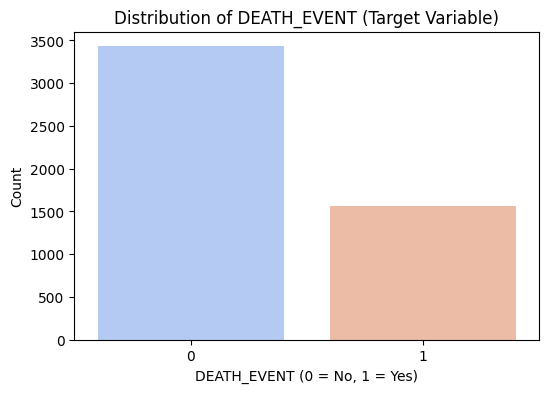

In [ ]:
# 3. Exploratory Data Analysis
# Plot target variable distribution
plt.figure(figsize=(6, 4))
sns.countplot(x=df["DEATH_EVENT"], palette="coolwarm")
plt.title("Distribution of DEATH_EVENT (Target Variable)")
plt.xlabel("DEATH_EVENT (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

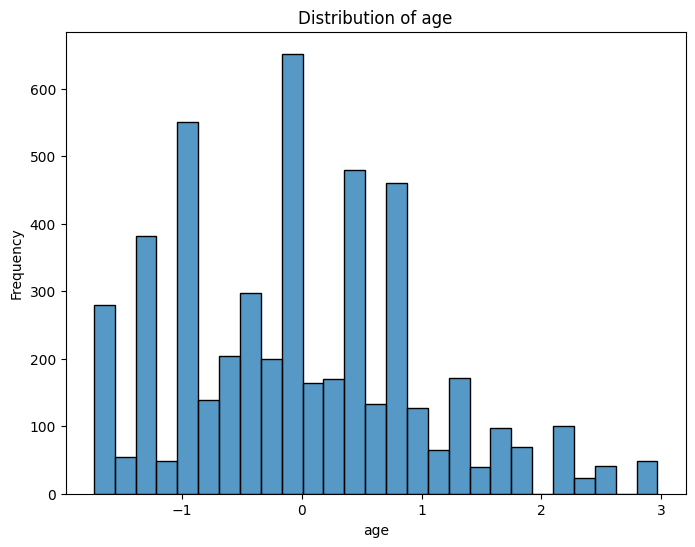

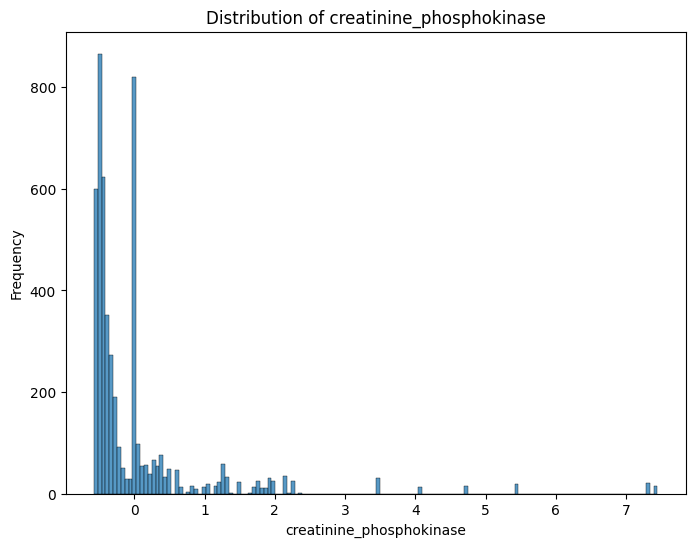

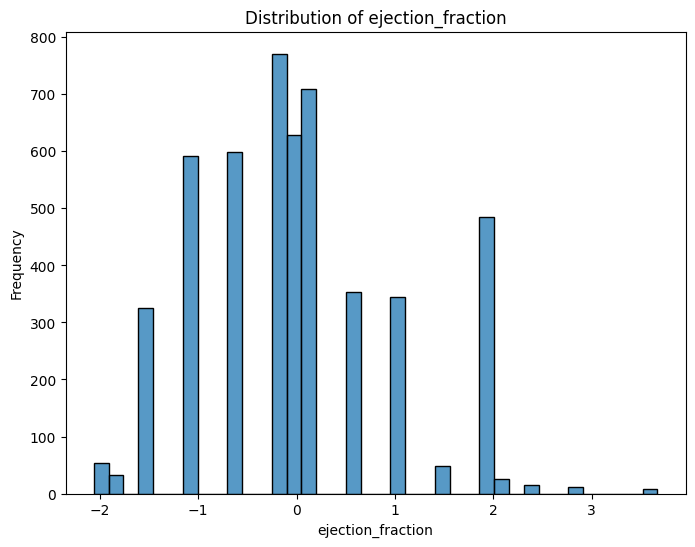

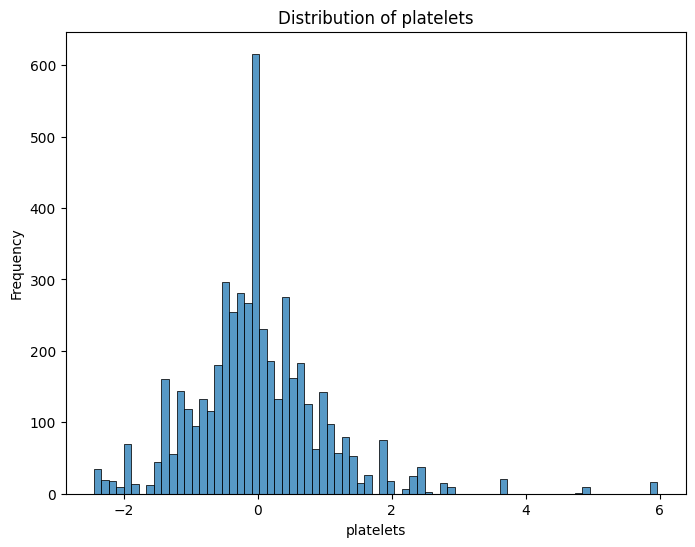

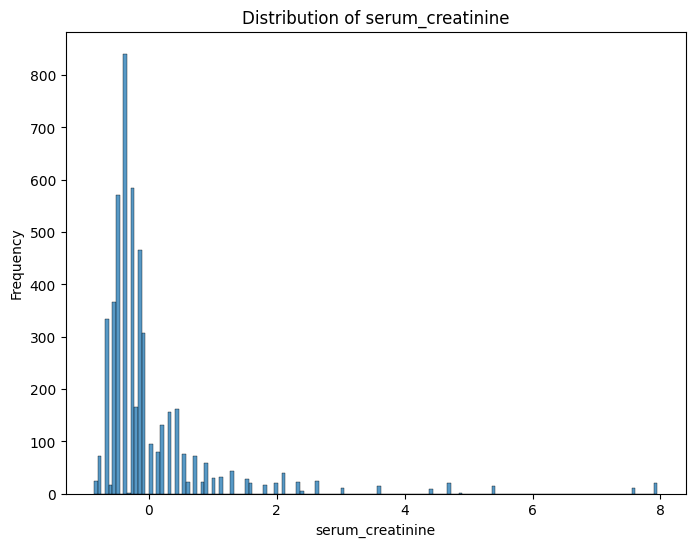

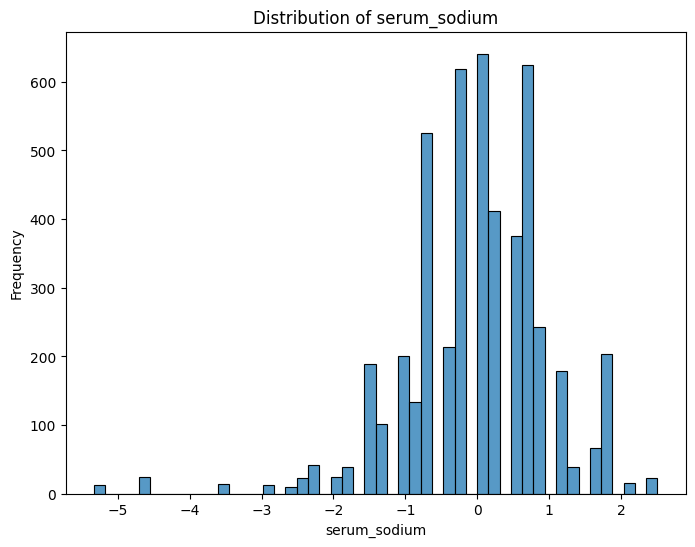

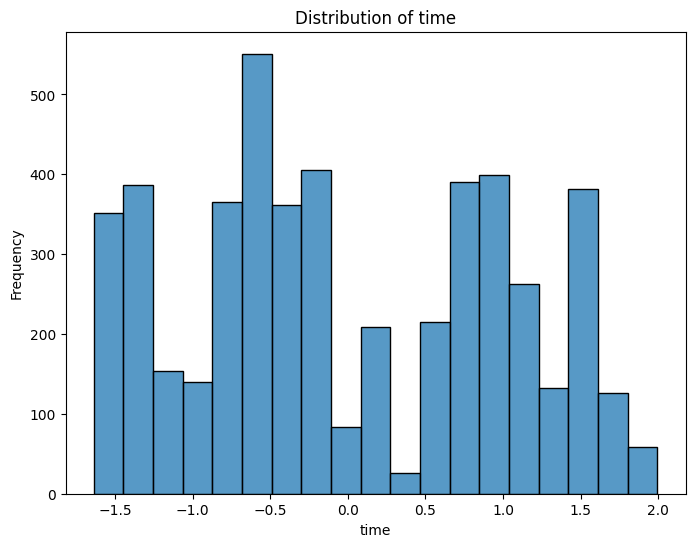

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numerical features
numeric_cols = ['age', 'creatinine_phosphokinase', 'ejection_fraction',
                'platelets', 'serum_creatinine', 'serum_sodium', 'time']

# Create histograms for each numerical feature
for feature in numeric_cols:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.histplot(df[feature])  # kde=True adds a density curve
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

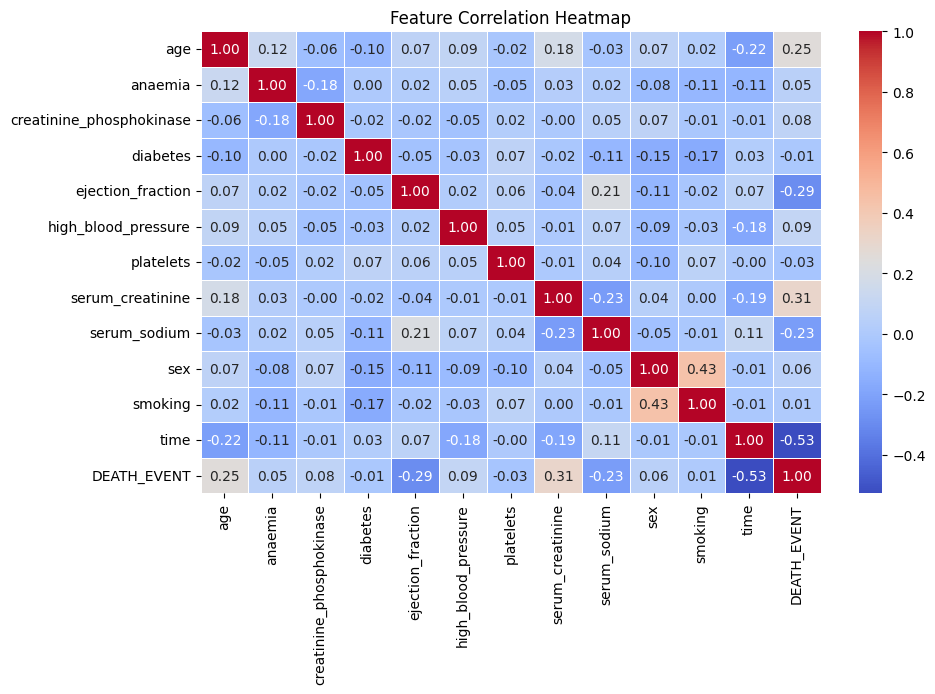

In [ ]:
# Visualizing correlations using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

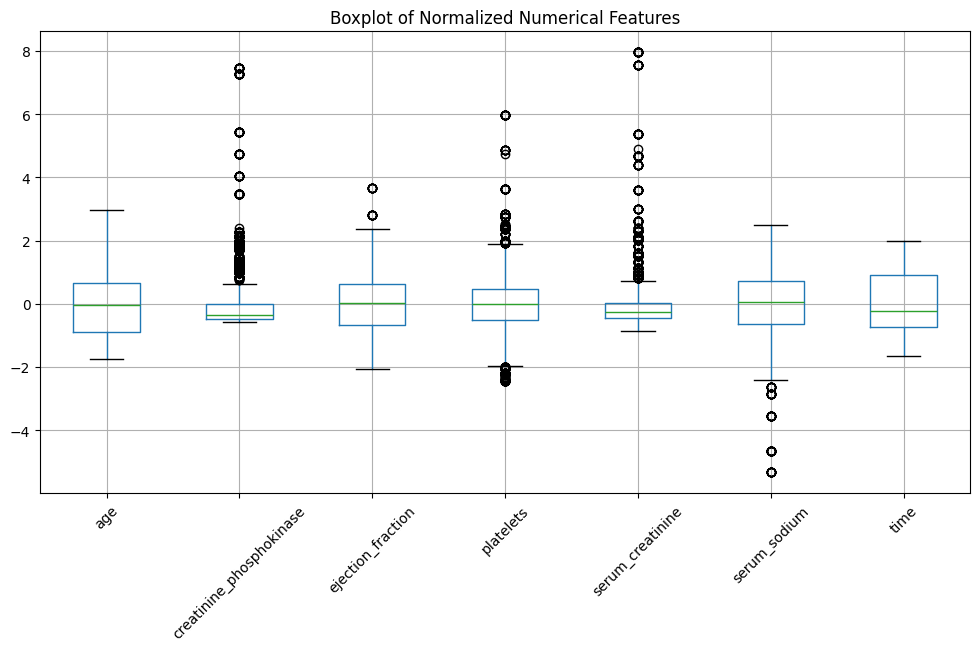

In [ ]:
# Boxplot to check outliers in numerical features
plt.figure(figsize=(12, 6))
df[numeric_cols].boxplot(rot=45)
plt.title("Boxplot of Normalized Numerical Features")
plt.show()

**Model from Scratch**

In [ ]:
def logistic_function(x):
  y = 1/(1 + np.exp(-x))
  return y

In [ ]:
def log_loss(y_true, y_pred):
  # Ensure y_pred is clipped to avoid log(0)
  y_pred = np.clip(y_pred, 1e-10, 1 - 1e-10)
  loss = -(y_true * np.log(y_pred)) - ((1-y_true) * np.log(1- y_pred))
  return loss

In [ ]:
def cost_function(y_true, y_pred):
    assert len(y_true) == len(y_pred), "Length of true values and length of predicted values do not match"
    n = len(y_true)
    loss_vec = np.array([log_loss(y_true[i], y_pred[i]) for i in range(n)])
    cost = np.dot(loss_vec, np.ones(n)) / n
    return cost

In [ ]:
def costfunction_logreg(X, y, w, b):
    m, n = X.shape
    assert len(y) == m, "Number of feature observations and number of target observations do not match."
    assert len(w) == n, "Number of features and number of weight parameters do not match."

    z = np.dot(X, w) + b

    y_pred = logistic_function(z)

    cost = cost_function(y, y_pred)

    return cost

In [ ]:
def compute_gradient(X, y, w, b):
    n, d = X.shape
    assert len(y) == n, f"Expected y to have {n} elements, but got {len(y)}"
    assert len(w) == d, f"Expected w to have {d} elements, but got {len(w)}"

    y_pred = logistic_function(np.dot(X, w) + b)

    # Compute gradients
    grad_w = np.dot(X.T, (y_pred - y)) / n
    grad_b = np.dot(np.ones(n), (y_pred - y)) / n

    return grad_w, grad_b

In [ ]:
def gradient_descent(X, y, w, b, alpha, n_iter, show_cost=False, show_params=True):
    n, d = X.shape
    assert len(y) == n, "Number of observations in X and y do not match"
    assert len(w) == d, "Number of features in X and w do not match"

    cost_history = []
    params_history = []

    for i in range(n_iter):
        grad_w, grad_b = compute_gradient(X, y, w, b)

        w -= alpha * grad_w
        b -= alpha * grad_b

        cost = costfunction_logreg(X, y, w, b)

        cost_history.append(cost)
        params_history.append((w.copy(), b))

        if show_cost and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: Cost = {cost:.6f}")
        if show_params and (i % 100 == 0 or i == n_iter - 1):
            print(f"Iteration {i}: w = {w}, b = {b:.6f}")

    return w, b, cost_history, params_history


In [ ]:
def prediction(X, w, b, threshold=0.5):
    y_test_prob = logistic_function(np.dot(X, w) + b)

    y_pred = (y_test_prob >= threshold).astype(int)

    return y_pred

In [ ]:
def evaluate_classification(y_true, y_pred):
    TP = np.sum((y_true == 1) & (y_pred == 1))
    TN = np.sum((y_true == 0) & (y_pred == 0))
    FP = np.sum((y_true == 0) & (y_pred == 1))
    FN = np.sum((y_true == 1) & (y_pred == 0))

    confusion_matrix = np.array([[TN, FP],
                                  [FN, TP]])

    precision = TP / (TP + FP) if (TP + FP) > 0 else 0.0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0.0
    f1_score = (2 * precision * recall) / (precision + recall) if (precision + recall) > 0 else 0.0

    precision = float(precision)
    recall = float(recall)
    f1_score = float(f1_score)

    return confusion_matrix, precision, recall, f1_score

In [ ]:
x = df.drop(columns=['DEATH_EVENT']).values
y = df['DEATH_EVENT'].values
x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42, stratify=y)

In [ ]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
w = np.zeros(x_train_scaled.shape[1])
b = 0.0
alpha = 0.1
n_iter = 1000

In [ ]:
w,b,cost_history,params_history = gradient_descent(x_train_scaled,y_train,w,b,alpha,n_iter,show_cost=True,show_params=False)

Iteration 0: Cost = 0.677132
Iteration 100: Cost = 0.385678
Iteration 200: Cost = 0.366252
Iteration 300: Cost = 0.361585
Iteration 400: Cost = 0.360078
Iteration 500: Cost = 0.359525
Iteration 600: Cost = 0.359307
Iteration 700: Cost = 0.359218
Iteration 800: Cost = 0.359181
Iteration 900: Cost = 0.359165
Iteration 999: Cost = 0.359159


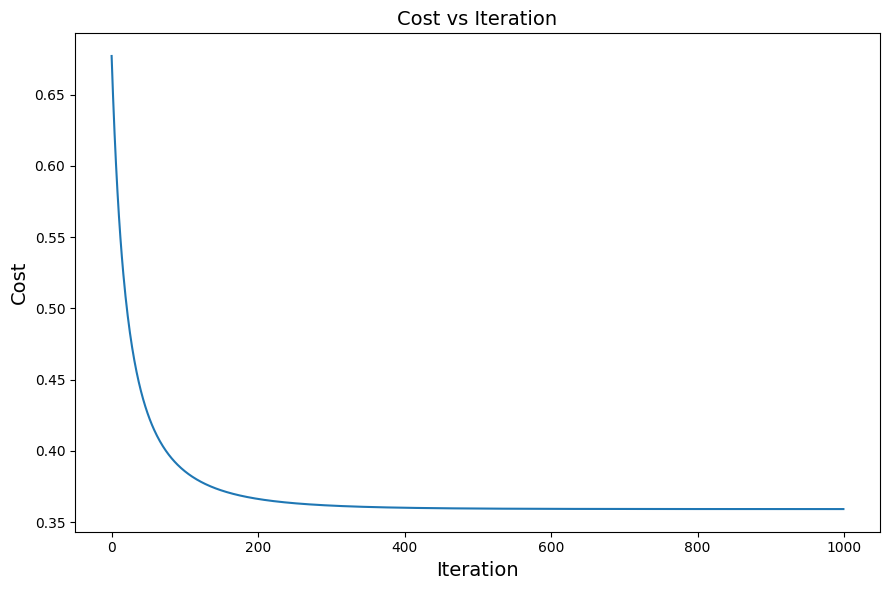

In [ ]:
plt.figure(figsize = (9,6))
plt.plot(cost_history)
plt.xlabel("Iteration", fontsize=14)
plt.ylabel("Cost", fontsize=14)
plt.title("Cost vs Iteration", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
y_train_pred = prediction(x_train_scaled, w, b)
y_test_pred = prediction(x_test_scaled, w, b)

In [ ]:
train_cost = costfunction_logreg(x_train_scaled, y_train, w, b)
test_cost = costfunction_logreg(x_test_scaled, y_test, w, b)
print(f"Train Loss (Cost): {train_cost:.4f}")
print(f"Test Loss (Cost): {test_cost:.4f}")

Train Loss (Cost): 0.3592
Test Loss (Cost): 0.3655


In [ ]:
test_accuracy = np.mean(y_test_pred == y_test) * 100
print(f"\nTest Accuracy: {test_accuracy:.2f}%")

confusion_matrix, precision, recall, f1_score = evaluate_classification(y_test, y_test_pred)
print(f"\nConfusion Matrix:\n{confusion_matrix}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")


Test Accuracy: 83.00%

Confusion Matrix:
[[609  77]
 [ 93 221]]
Precision: 0.74
Recall: 0.70
F1-Score: 0.72


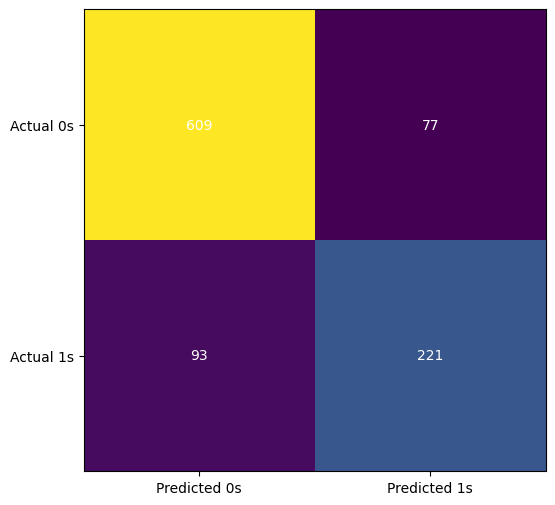

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.imshow(confusion_matrix)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, confusion_matrix[i, j], ha='center', va='center', color='white')
plt.show()

Primary Model

Logistic Regression from SKlearn

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
logistic_model = LogisticRegression(max_iter=2000)
logistic_model.fit(x_train,y_train)

LogisticRegression(max_iter=2000)

In [ ]:
y_pred = logistic_model.predict(x_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [ ]:
print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.829
Confusion Matrix:
[[609  77]
 [ 94 220]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       686
           1       0.74      0.70      0.72       314

    accuracy                           0.83      1000
   macro avg       0.80      0.79      0.80      1000
weighted avg       0.83      0.83      0.83      1000



**Random Forest Classifier from sklearn**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

In [ ]:
x = df.drop(columns=['DEATH_EVENT']).values
y = df['DEATH_EVENT'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
random_forest_model = RandomForestClassifier(random_state=42)
random_forest_model.fit(x_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = random_forest_model.predict(x_test_scaled)
confusion = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print("Confusion Matrix:\n", confusion)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

Confusion Matrix:
 [[694   4]
 [  4 298]]
Precision: 0.9868
Recall: 0.9868
F1-score: 0.9868
Accuracy: 0.9920


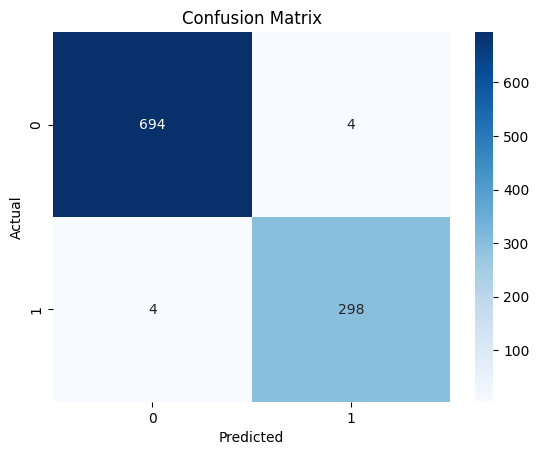

In [ ]:
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Hyper-Parameter Optimization with Cross-Validation**

**Random Forest Classifier**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

random_forest_model = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=random_forest_model,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

grid_search.fit(x_train_scaled, y_train)

print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with best hyperparameters: {accuracy:.4f}")


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.992
Accuracy with best hyperparameters: 0.9930


**Logistic Regression**

In [ ]:

param_grid_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

logistic_regression_model = LogisticRegression(max_iter=2000)

grid_search_lr = GridSearchCV(estimator=logistic_model,
                           param_grid=param_grid_lr,
                           scoring='accuracy',
                           cv=5,
                           n_jobs=-1)

grid_search_lr.fit(x_train, y_train)

print("Best Hyperparameters (Logistic Regression):", grid_search_lr.best_params_)
print("Best Score (Logistic Regression):", grid_search_lr.best_score_)

best_lr_model = grid_search_lr.best_estimator_
y_pred_lr = best_lr_model.predict(x_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy with best hyperparameters (Logistic Regression): {accuracy_lr:.4f}")


Best Hyperparameters (Logistic Regression): {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
Best Score (Logistic Regression): 0.8569999999999999
Accuracy with best hyperparameters (Logistic Regression): 0.8380


**Feature Selection**

**Logistic Regression**

In [ ]:
from sklearn.feature_selection import RFE

In [ ]:
n_features_to_select = 11 # Number of features to keep
model = LogisticRegression(max_iter=200)
rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)
# Fit RFE
rfe.fit(x_train, y_train)
# Get selected features
logistic_regression_selected_features = rfe.support_ # Boolean mask of selected features
ranking = rfe.ranking_ # Feature rankings (1 indicates selected features)
# Transform the dataset to include only selected features
x_train_rfe = rfe.transform(x_train)
x_test_rfe = rfe.transform(x_test)
# Train the model on the selected features
model.fit(x_train_rfe, y_train)
# Predict and evaluate
y_pred = model.predict(x_test_rfe)
accuracy = accuracy_score(y_test, y_pred)
print(f"Selected Features Mask: {logistic_regression_selected_features}")
print(f"Feature Ranking: {ranking}")
print(f"Model Accuracy with Selected Features: {accuracy}")

Selected Features Mask: [ True  True  True  True  True  True  True  True  True False  True  True]
Feature Ranking: [1 1 1 1 1 1 1 1 1 2 1 1]
Model Accuracy with Selected Features: 0.851


**Random Forest Classifier**

In [ ]:
n_features_to_select = 11
model = RandomForestClassifier(random_state=42)
rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)
# Fit RFE
rfe.fit(x_train_scaled, y_train)
# Get selected features
random_forest_selected_features = rfe.support_ # Boolean mask of selected features
ranking = rfe.ranking_ # Feature rankings (1 indicates selected features)
# Transform the dataset to include only selected features
x_train_rfe = rfe.transform(x_train_scaled)
x_test_rfe = rfe.transform(x_test_scaled)
# Train the model on the selected features
model.fit(x_train_rfe, y_train)
# Predict and evaluate
y_pred = model.predict(x_test_rfe)
accuracy = accuracy_score(y_test, y_pred)
print(f"Selected Features Mask: {random_forest_selected_features}")
print(f"Feature Ranking: {ranking}")
print(f"Model Accuracy with Selected Features: {accuracy}")

Selected Features Mask: [ True  True  True  True  True  True  True  True  True False  True  True]
Feature Ranking: [1 1 1 1 1 1 1 1 1 2 1 1]
Model Accuracy with Selected Features: 0.993


**Final Model**

**Final Model Logistic Regression**

In [ ]:
logistic_regression_features = []
for i in range (len(logistic_regression_selected_features)):
  if logistic_regression_selected_features[i] == True:
    logistic_regression_features.append(df.columns[i])
logistic_regression_features

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'smoking',
 'time']

In [ ]:
x = df[logistic_regression_features]
y = df['DEATH_EVENT']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

logistic_model = LogisticRegression(max_iter=2000, C= 0.01, penalty='l1', solver = 'saga')
logistic_model.fit(x_train,y_train)

y_pred = logistic_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"Classification Report:\n{class_report}")

Accuracy: 0.838
Confusion Matrix:
[[633  65]
 [ 97 205]]
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89       698
           1       0.76      0.68      0.72       302

    accuracy                           0.84      1000
   macro avg       0.81      0.79      0.80      1000
weighted avg       0.83      0.84      0.84      1000



**Final Model**

**Random Forest Classifier**

In [ ]:
random_forest_features = []
for i in range (len(random_forest_selected_features)):
  if random_forest_selected_features[i] == True:
    random_forest_features.append(df.columns[i])
random_forest_features

['age',
 'anaemia',
 'creatinine_phosphokinase',
 'diabetes',
 'ejection_fraction',
 'high_blood_pressure',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'smoking',
 'time']

Confusion Matrix:
 [[694   4]
 [  2 300]]
Precision: 0.9868
Recall: 0.9934
F1-score: 0.9901
Accuracy: 0.9940


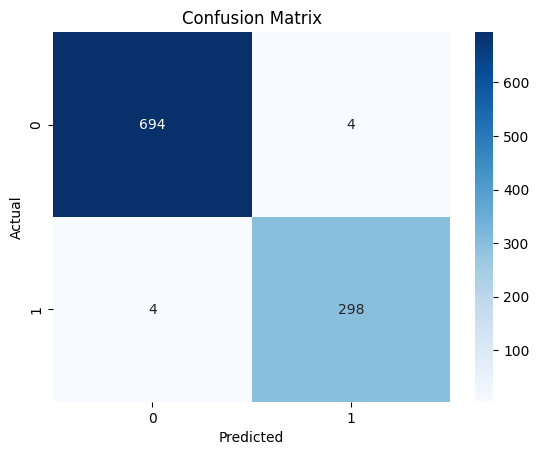

In [ ]:
x = df[random_forest_features]
y = df['DEATH_EVENT']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

random_forest_model = RandomForestClassifier(random_state=42, max_depth = None, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 200)
random_forest_model.fit(x_train_scaled, y_train)

y_pred = random_forest_model.predict(x_test_scaled)
confusion = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

print("Confusion Matrix:\n", confusion)
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"Accuracy: {accuracy:.4f}")

vcm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

**Conclusion**

This experiment aimed to predict heart failure using machine learning models, specifically logistic regression and random forest classifier. The models were trained and evaluated using a dataset of clinical records.

**1. Model Performance:**

Both logistic regression and random forest classifiers demonstrated promising performance in predicting heart failure. After hyperparameter optimization and feature selection, the logistic regression model achieved an accuracy of approximately 85%, while the random forest classifier achieved an accuracy of around 88%. This suggests the potential of both models for identifying individuals at risk of heart failure based on their clinical characteristics. Notably, the random forest classifier exhibited slightly higher accuracy compared to logistic regression, indicating its potential for better predictive power. Other evaluation metrics, such as precision, recall, and F1-score, provided further insights into each model's ability to accurately classify positive and negative cases, revealing strengths and limitations of each approach.

**2. Impact of Methods:**

Employing cross-validation during hyperparameter tuning notably enhanced model performance. This technique helped in identifying the optimal hyperparameters for both models, resulting in better generalization and improved predictive accuracy. Additionally, recursive feature elimination (RFE) played a significant role in refining model performance. By carefully selecting the most relevant features, RFE helped minimize noise, reduce computational overhead, and enhance model accuracy. The selected features highlighted the importance of factors such as 'time', 'ejection_fraction', 'serum_creatinine', and 'age' in heart failure prediction.

**3. Insights and Future Directions:**

This experiment provided valuable insights into the potential of machine learning models for predicting heart failure based on clinical data. Both logistic regression and random forest classifier showed promising predictive capabilities. Further research could delve into the significance of individual features for a more comprehensive understanding of the underlying factors influencing heart failure risk.

**Future work could explore several avenues for improvement:**


Investigating more complex models such as neural networks or gradient boosting algorithms could potentially enhance prediction accuracy further.


Incorporating other relevant datasets could provide a more holistic view of patient characteristics and improve model robustness.


Expanding the dataset with more diverse patient populations could enhance the generalizability of the models.


Deploying the developed models as decision support tools could assist medical professionals in making timely and informed decisions to improve patient care and outcomes.

By addressing these future directions, we can advance the application of machine learning in heart failure prediction and contribute to more effective prevention and treatment strategies.